In [1]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
x_train = (np.random.randn(200) + np.linspace(0, 10, 200)).reshape(200, -1).astype(np.float32)
y_train = (np.random.randn(200) + np.linspace(0, 10, 200)).reshape(200, -1).astype(np.float32)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [4]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

In [5]:
model = LinearRegression().cuda()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

In [6]:
num_epochs = 1000

In [7]:
for epoch in range(num_epochs):
    inputs = x_train.cuda()
    target = y_train.cuda()
    
    out = model(inputs)
    loss = criterion(out, target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print 'Epoch [{}/{}], loss:{:.06f}'.format(epoch+1, num_epochs, loss.item())

Epoch [99/1000], loss:2.346816
Epoch [199/1000], loss:2.330603
Epoch [299/1000], loss:2.326678
Epoch [399/1000], loss:2.325702
Epoch [499/1000], loss:2.325435
Epoch [599/1000], loss:2.325339
Epoch [699/1000], loss:2.325283
Epoch [799/1000], loss:2.325238
Epoch [899/1000], loss:2.325195
Epoch [999/1000], loss:2.325154


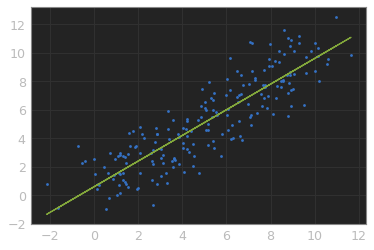

In [8]:
#model.eval()
predict = model(x_train.cuda()).cpu().data.numpy()

plt.plot(x_train.numpy(), y_train.numpy(), '.')
plt.plot(x_train.numpy(), predict)

plt.legend()
plt.show()

In [10]:
torch.save(model.state_dict(), './ser/linear.pth')

In [12]:
model.eval?